## 1. Installs Necesarios

In [3]:
!pip install pyreadstat

## Convertir archivos .sav a .csv

In [4]:
# Import required modules
import pyreadstat
import pandas as pd

# Function to convert .sav to .csv
def convert_sav_to_csv(sav_file_path, csv_file_path):
    # Read the .sav file
    df, meta = pyreadstat.read_sav(sav_file_path)
    
    # Save DataFrame to .csv
    df.to_csv(csv_file_path, index=False)
    print(f"File saved as '{csv_file_path}'")

# Path to your .sav file
sav_file_path = 'ENCOVI_Hogar.sav'

# Desired path for your .csv file
csv_file_path = 'ENCOVI_Hogar.csv'

# Convert the file
convert_sav_to_csv(sav_file_path, csv_file_path)


File saved as 'ENCOVI_Hogar.csv'


In [5]:
# Import required modules
import pyreadstat
import pandas as pd

# Function to convert .sav to .csv
def convert_sav_to_csv(sav_file_path, csv_file_path):
    # Read the .sav file
    df, meta = pyreadstat.read_sav(sav_file_path)
    
    # Save DataFrame to .csv
    df.to_csv(csv_file_path, index=False)
    print(f"File saved as '{csv_file_path}'")

# Path to your .sav file
sav_file_path = 'ENCOVI_Personas.sav'

# Desired path for your .csv file
csv_file_path = 'ENCOVI_Personas.csv'

# Convert the file
convert_sav_to_csv(sav_file_path, csv_file_path)


File saved as 'ENCOVI_Personas.csv'


## Parte 1: Análisis Exploratorio de Datos (EDA)

### 1. Carga y Limpieza de Datos

In [6]:
import pandas as pd

# Cargar los archivos CSV
encovi_hogar_path = './ENCOVI_Hogar.csv'
encovi_personas_path = './ENCOVI_Personas.csv'

# Leer los archivos de datos
try:
    # Algunos archivos CSV pueden requerir un encoding específico para leerse correctamente, 
    # es común el uso de 'latin1' o 'ISO-8859-1' para archivos en español.
    encovi_hogar_df = pd.read_csv(encovi_hogar_path, encoding='latin1')
    encovi_personas_df = pd.read_csv(encovi_personas_path, encoding='latin1')
    
    # Muestra de los primeros registros de cada DataFrame
    hogar_head = encovi_hogar_df.head()
    personas_head = encovi_personas_df.head()
except Exception as e:
    hogar_head, personas_head = e, e

(hogar_head, personas_head)


C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\2027324243.py:12: DtypeWarning: Columns (327,328,329) have mixed types. Specify dtype option on import or set low_memory=False.
  encovi_personas_df = pd.read_csv(encovi_personas_path, encoding='latin1')


(   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  PPB01  \
 0     1.0    1.0   1.0  1.0     1.0   525.0   1575.0      3.0     3.0    2.0   
 1     1.0    1.0   1.0  1.0     2.0   525.0   1575.0      3.0     3.0    2.0   
 2     1.0    1.0   1.0  1.0     3.0   525.0   9450.0      2.0    18.0    2.0   
 3     1.0    1.0   1.0  1.0     4.0   525.0   3150.0      2.0     6.0    2.0   
 4     1.0    1.0   1.0  1.0     5.0   525.0   1575.0      3.0     3.0    2.0   
 
    ...  P01H10  P01H11  P01H12  P01H13  P01H14  P01H15  P01H16  DIA_ENC  \
 0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   
 1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     27.0   
 2  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0     22.0   
 3  ...     2.0     2.0     2.0     2.0     2.0     2.0     2.0     24.0   
 4  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   
 
    MES_ENC   A_ENC  
 0      8.0  2014.0  
 1      8.

In [7]:
# Función para calcular el porcentaje de valores faltantes por columna
def missing_values_percentage(df):
    return (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

# Calcular el porcentaje de valores faltantes para cada DataFrame
hogar_missing_percentage = missing_values_percentage(encovi_hogar_df)
personas_missing_percentage = missing_values_percentage(encovi_personas_df)

# Función para normalizar los nombres de las columnas
def normalize_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return df

# Normalizar los nombres de las columnas
encovi_hogar_df = normalize_column_names(encovi_hogar_df)
encovi_personas_df = normalize_column_names(encovi_personas_df)

# Visualizar los nombres de columnas normalizados y el porcentaje de valores faltantes
(hogar_missing_percentage.head(10), personas_missing_percentage.head(10),
 encovi_hogar_df.columns[:10], encovi_personas_df.columns[:10])


C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\3331722301.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\3331722301.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\3331722301.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated a

(P01E02_7            99.713939
 UNIDAD_FUENTES_7    99.713939
 P01E03_7            99.713939
 PPD04B              99.488558
 PPD04C              99.488558
 UNIDAD_FUENTES_9    99.315187
 P01E03_9            99.219834
 P01E02_9            99.219834
 P01D15B             97.858877
 PPA11B              97.174064
 dtype: float64,
 P10C06B    99.989055
 P10C10B    99.987231
 P10C08B    99.983583
 P11A03B    99.968991
 P11A10B    99.959870
 P05D15B    99.959870
 P11A02B    99.948926
 P05D16B    99.943453
 P10C09B    99.901499
 P05D18D    99.874138
 dtype: float64,
 Index(['region', 'depto', 'area', 'upm', 'numhog', 'factor', 'factor3',
        'pobreza', 'thogar', 'ppb01'],
       dtype='object'),
 Index(['region', 'depto', 'area', 'upm', 'numhog', 'factor', 'pobreza',
        'thogar', 'id', 'ppa02'],
       dtype='object'))

In [8]:
# Función para limpiar el DataFrame
def clean_dataframe(df):
    # Eliminar columnas con más del 90% de valores faltantes
    df_cleaned = df.loc[:, df.isnull().mean() < .9]

    # Rellenar valores faltantes para variables numéricas con la mediana
    num_cols = df_cleaned.select_dtypes(include=['number']).columns
    df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

    # Rellenar valores faltantes para variables categóricas con la moda
    cat_cols = df_cleaned.select_dtypes(exclude=['number']).columns
    df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

    return df_cleaned

# Limpiar ambos DataFrames
encovi_hogar_cleaned = clean_dataframe(encovi_hogar_df)
encovi_personas_cleaned = clean_dataframe(encovi_personas_df)

# Verificar si aún hay valores faltantes después de la limpieza
hogar_remaining_missing = missing_values_percentage(encovi_hogar_cleaned)
personas_remaining_missing = missing_values_percentage(encovi_personas_cleaned)

# Resultados de la limpieza
(hogar_remaining_missing.head(), personas_remaining_missing.head(),
 encovi_hogar_cleaned.shape, encovi_personas_cleaned.shape)


C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\1600631277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())
C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\1600631277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])
C:\Users\esteb\AppData\Local\Temp\ipykernel_4796\1600631277.py:8: SettingWithCopyWarning: 
A value is trying to be se

(region          0.0
 id_fuentes_3    0.0
 p01e01_6        0.0
 id_fuentes_6    0.0
 p01e03_5        0.0
 dtype: float64,
 region     0.0
 p09f03a    0.0
 p09d01a    0.0
 p09d01b    0.0
 p09d01c    0.0
 dtype: float64,
 (11536, 125),
 (54822, 266))

### 2. Análisis Univariable

(             region         depto         area           upm        numhog
 count  11536.000000  11536.000000  11536.00000  11536.000000  11536.000000
 mean       4.599515     10.464719      1.54525    518.861477   5768.500000
 std        1.890770      6.674172      0.49797    300.271095   3330.300687
 min        1.000000      1.000000      1.00000      1.000000      1.000000
 25%        3.000000      4.000000      1.00000    258.000000   2884.750000
 50%        5.000000     10.000000      2.00000    522.500000   5768.500000
 75%        6.000000     16.000000      2.00000    779.000000   8652.250000
 max        8.000000     22.000000      2.00000   1037.000000  11536.000000,
 region      6.0
 depto       1.0
 area        2.0
 upm       640.0
 numhog      1.0
 Name: 0, dtype: float64,
              region         depto          area           upm        numhog
 count  54822.000000  54822.000000  54822.000000  54822.000000  54822.000000
 mean       4.694849     10.708894      1.582412  

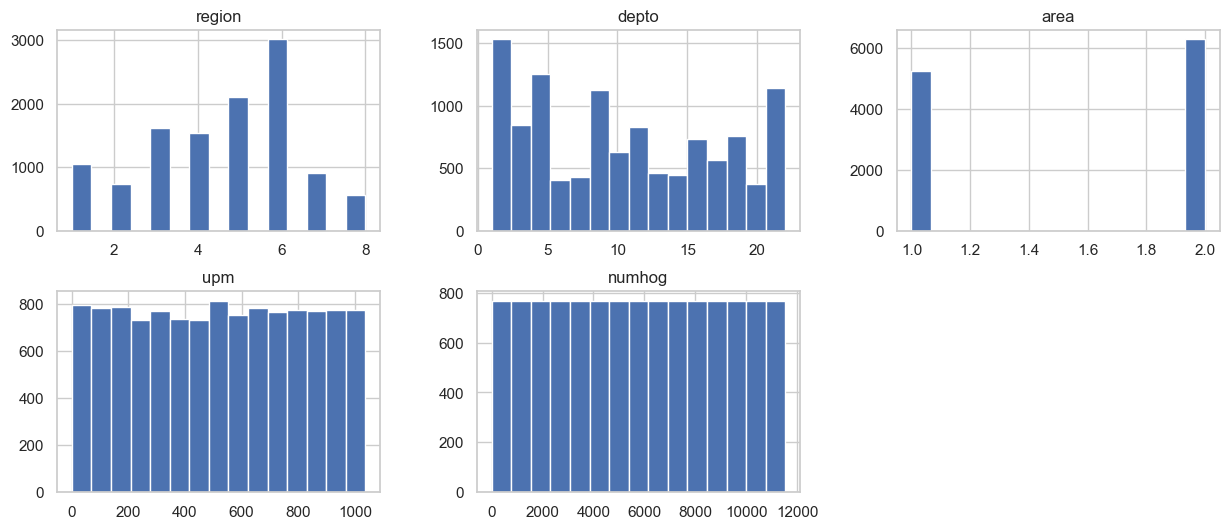

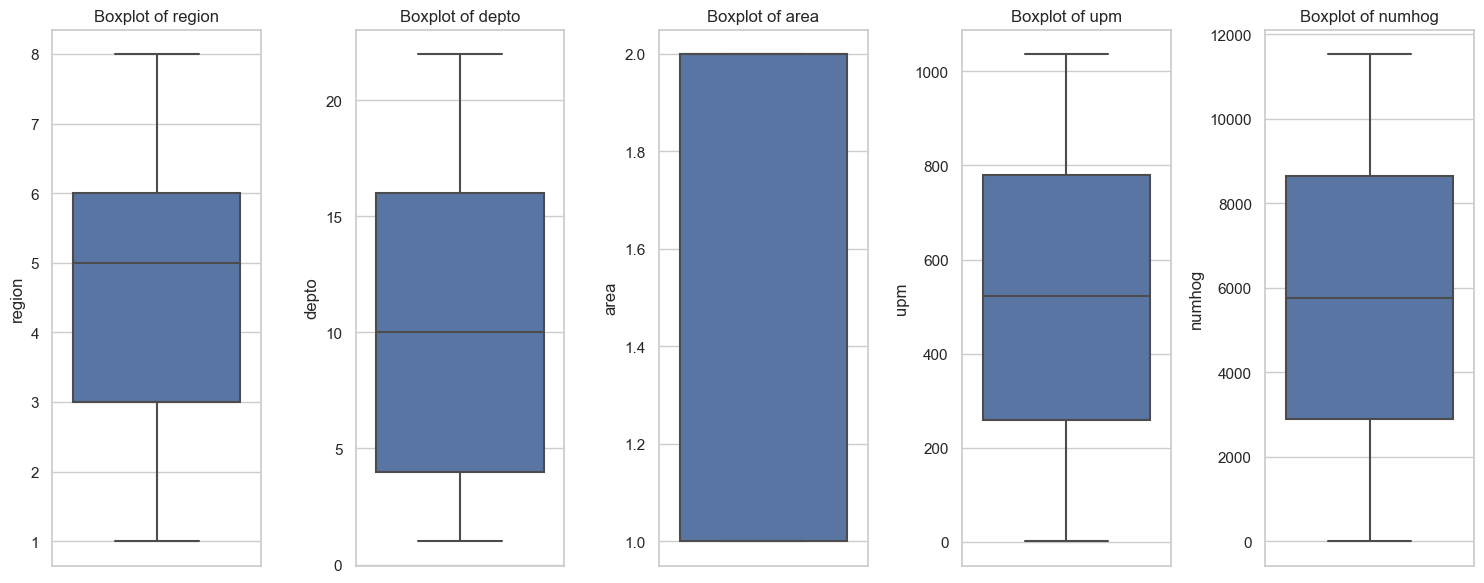

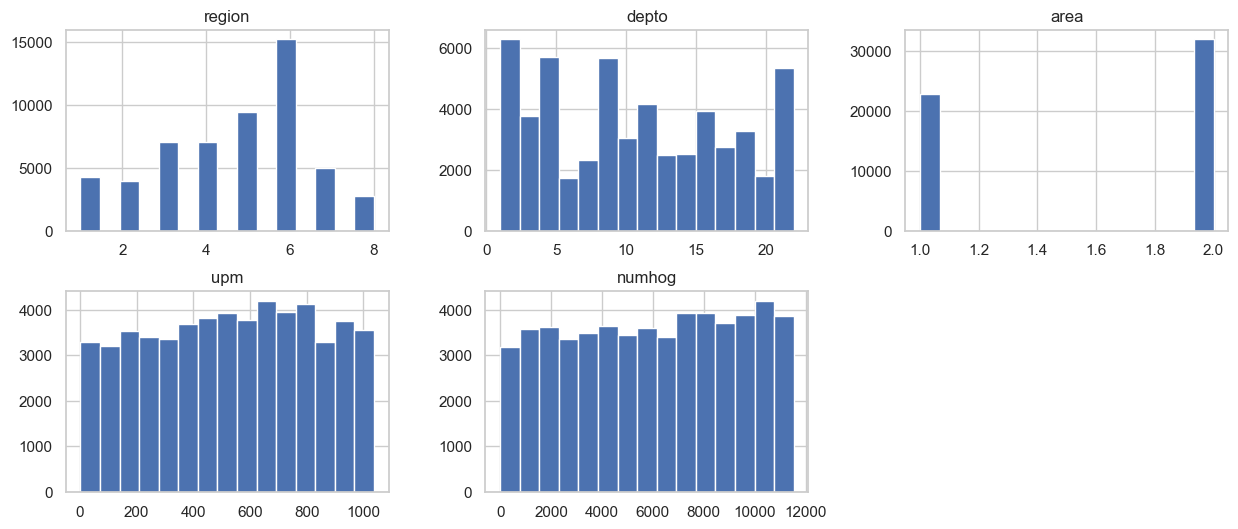

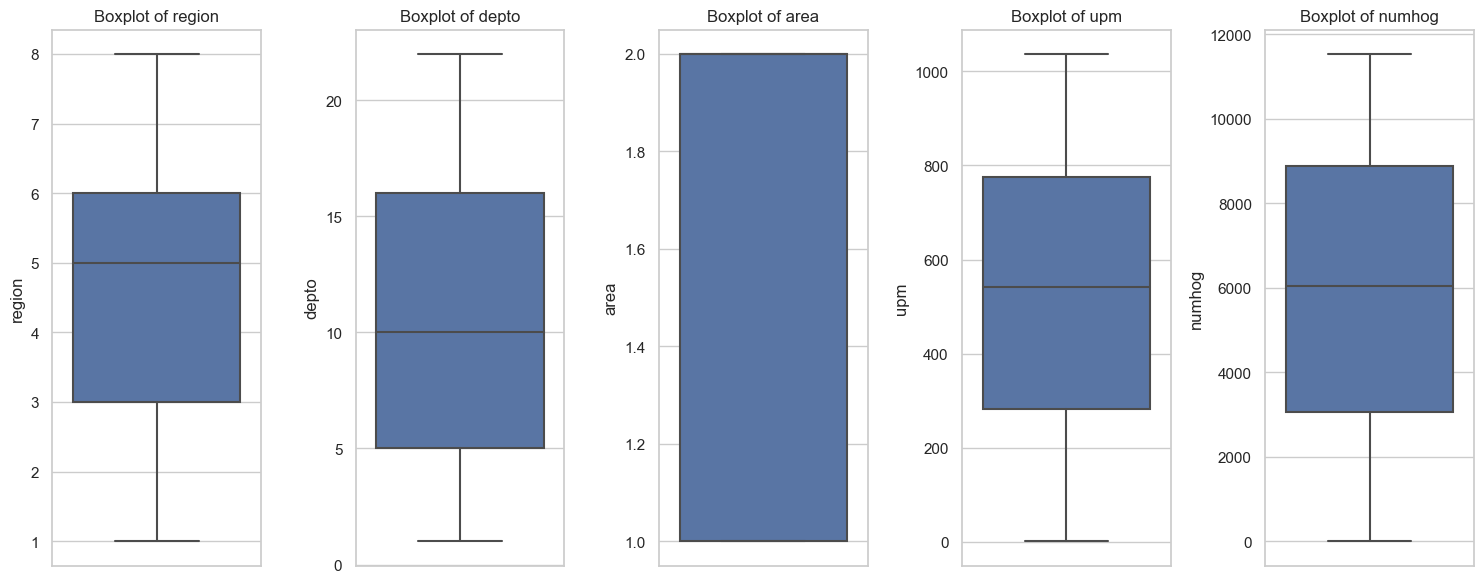

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Función para realizar análisis univariable de columnas numéricas
def univariate_analysis(df, num_cols_sample=5):
    # Seleccionar una muestra de columnas numéricas para el análisis
    sample_cols = df.select_dtypes(include=['number']).columns[:num_cols_sample]
    # Estadísticas descriptivas
    descriptive_stats = df[sample_cols].describe()
    # Moda (el .mode() devuelve un DataFrame, seleccionamos la fila 0 para obtener la moda de cada columna)
    mode = df[sample_cols].mode().iloc[0]

    # Histogramas
    df[sample_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))

    # Boxplots
    fig, ax = plt.subplots(nrows=1, ncols=num_cols_sample, figsize=(15, 6))
    for i, col in enumerate(sample_cols):
        sns.boxplot(y=col, data=df, ax=ax[i])
        ax[i].set_title(f'Boxplot of {col}')
    plt.tight_layout()

    return descriptive_stats, mode

# Análisis univariable para el conjunto de datos de hogares
hogar_descriptive_stats, hogar_mode = univariate_analysis(encovi_hogar_cleaned)

# Análisis univariable para el conjunto de datos de personas
personas_descriptive_stats, personas_mode = univariate_analysis(encovi_personas_cleaned)

(hogar_descriptive_stats, hogar_mode, personas_descriptive_stats, personas_mode)


### 3. Análisis Bivariable

(          region     depto      area       upm    numhog
 region  1.000000  0.137933  0.139590  0.197300  0.972387
 depto   0.137933  1.000000  0.301352  0.994899  0.142793
 area    0.139590  0.301352  1.000000  0.323054  0.153455
 upm     0.197300  0.994899  0.323054  1.000000  0.206936
 numhog  0.972387  0.142793  0.153455  0.206936  1.000000,
           region     depto      area       upm    numhog
 region  1.000000  0.104334  0.132388  0.163314  0.972767
 depto   0.104334  1.000000  0.304056  0.994880  0.113829
 area    0.132388  0.304056  1.000000  0.325064  0.148527
 upm     0.163314  0.994880  0.325064  1.000000  0.177907
 numhog  0.972767  0.113829  0.148527  0.177907  1.000000)

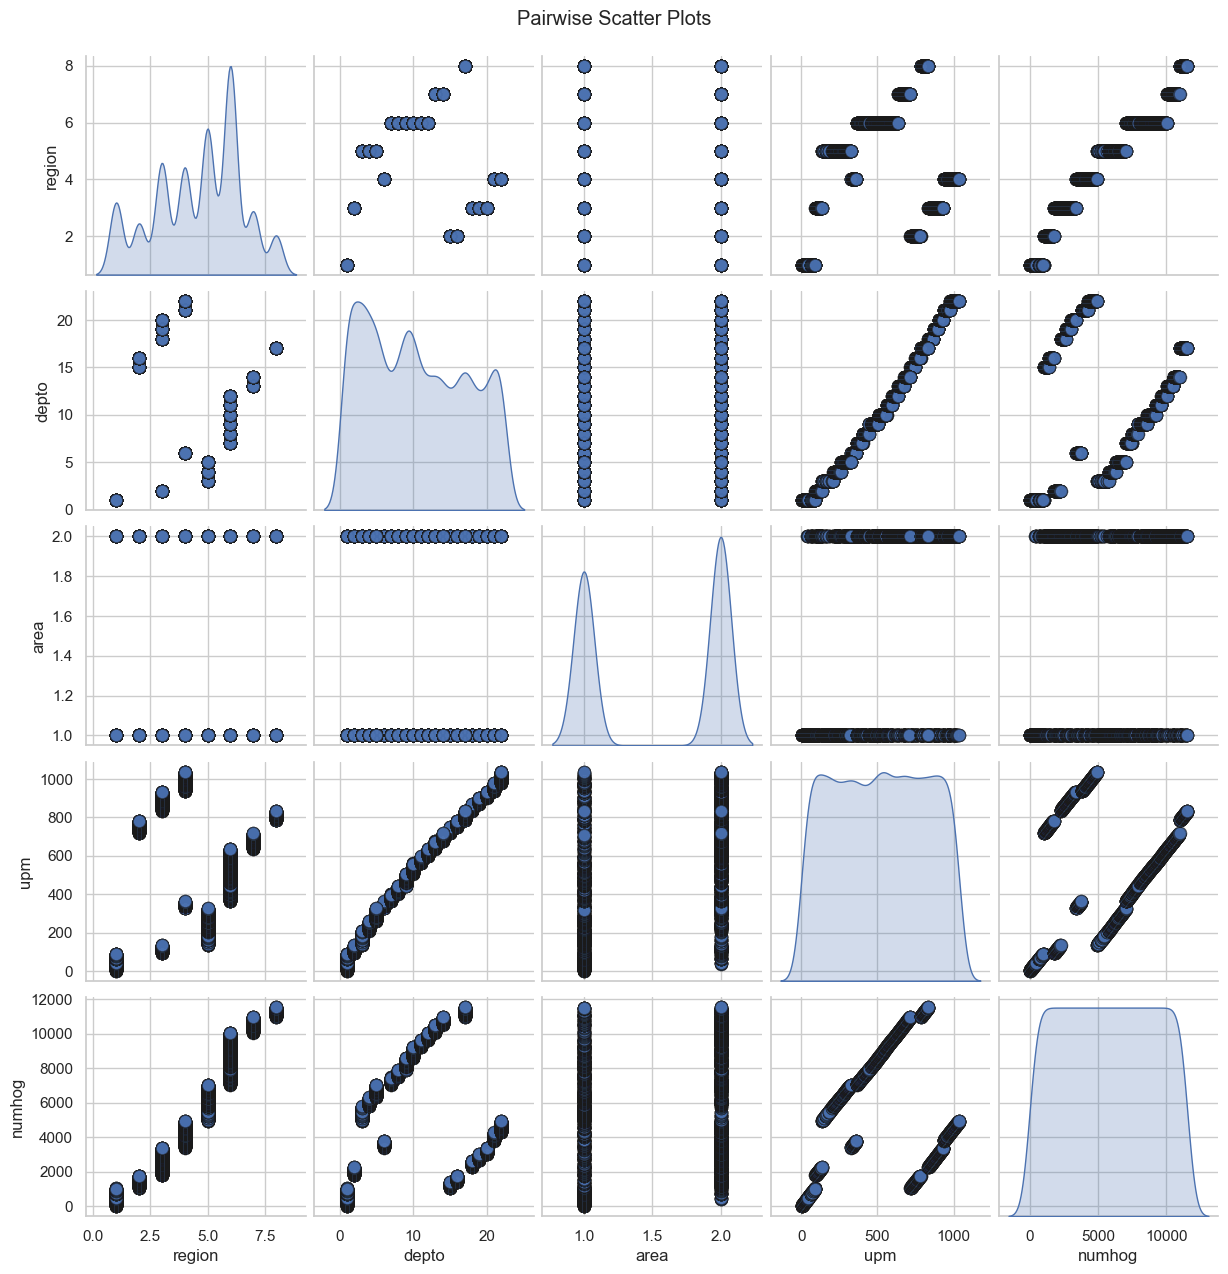

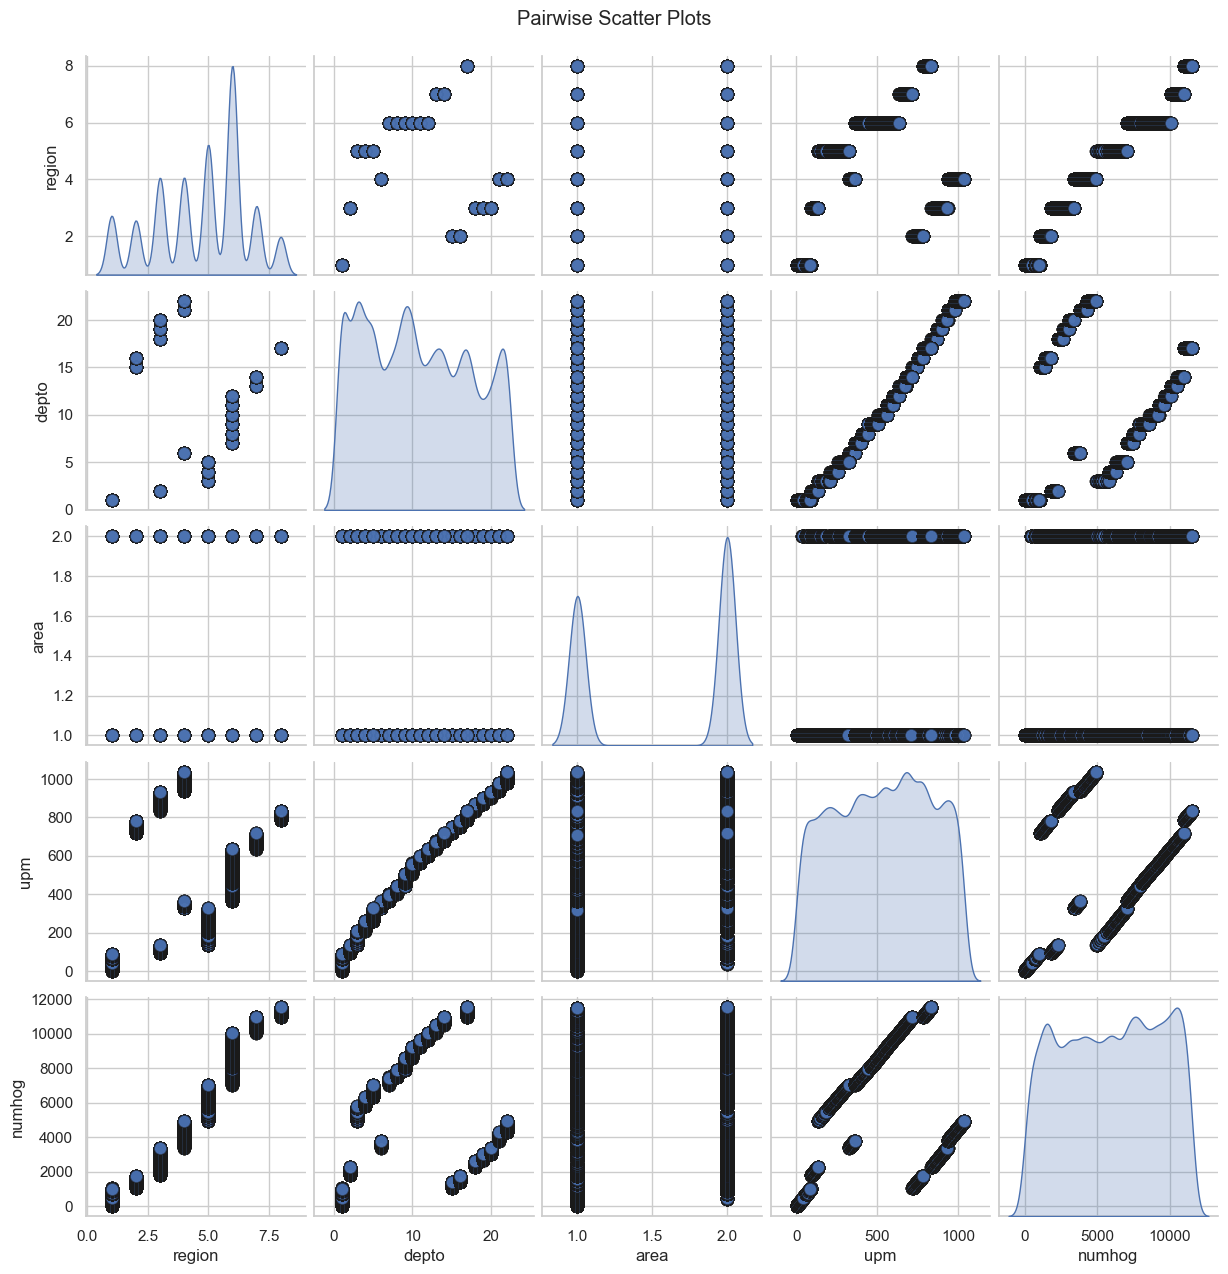

In [10]:
# Función para realizar análisis bivariable
def bivariate_analysis(df, num_cols_sample=5):
    # Seleccionar una muestra de columnas numéricas para el análisis
    sample_cols = df.select_dtypes(include=['number']).columns[:num_cols_sample]

    # Correlaciones
    corr_matrix = df[sample_cols].corr()

    # Scatter plots
    sns.pairplot(df[sample_cols], diag_kind='kde', plot_kws={'alpha':0.2, 's':80, 'edgecolor':'k'})
    plt.suptitle('Pairwise Scatter Plots', y=1.02)

    return corr_matrix

# Análisis bivariable para el conjunto de datos de hogares
hogar_corr_matrix = bivariate_analysis(encovi_hogar_cleaned)

# Análisis bivariable para el conjunto de datos de personas
personas_corr_matrix = bivariate_analysis(encovi_personas_cleaned)

(hogar_corr_matrix, personas_corr_matrix)

### 4. Visualización de Datos

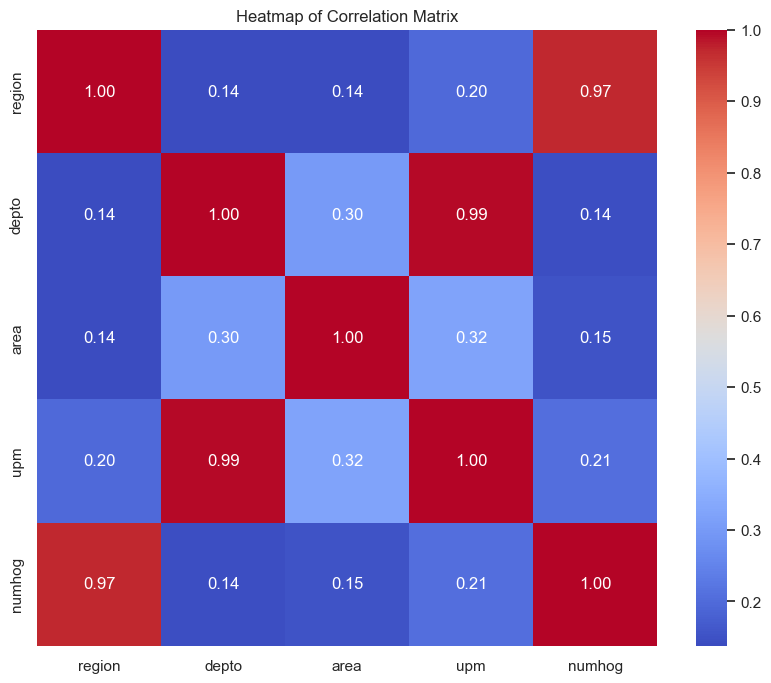

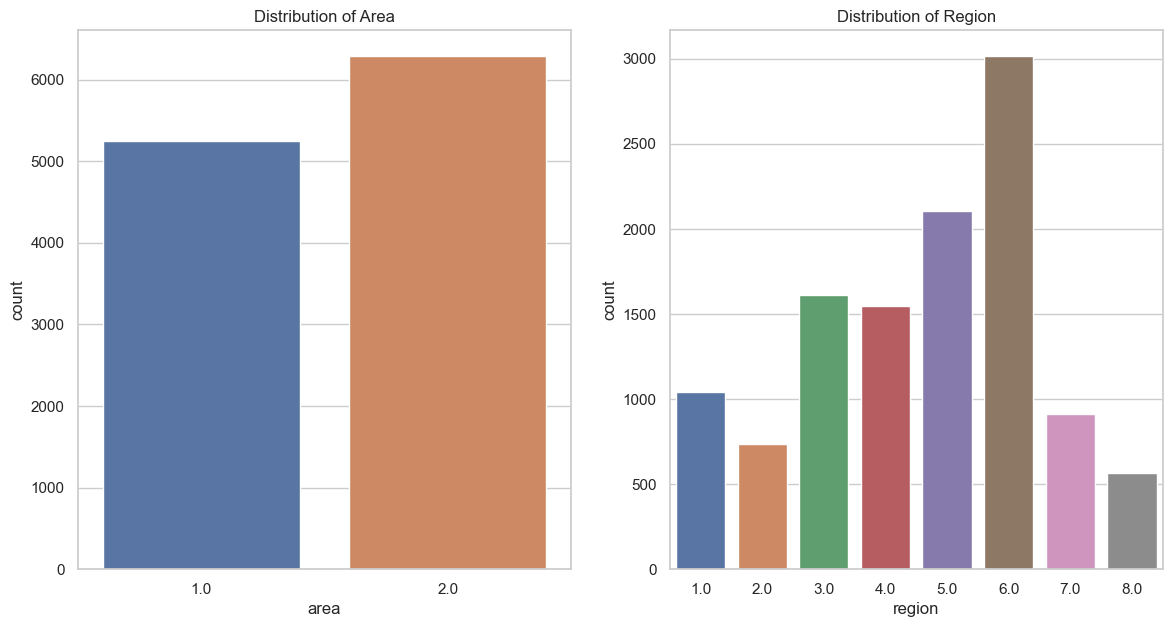

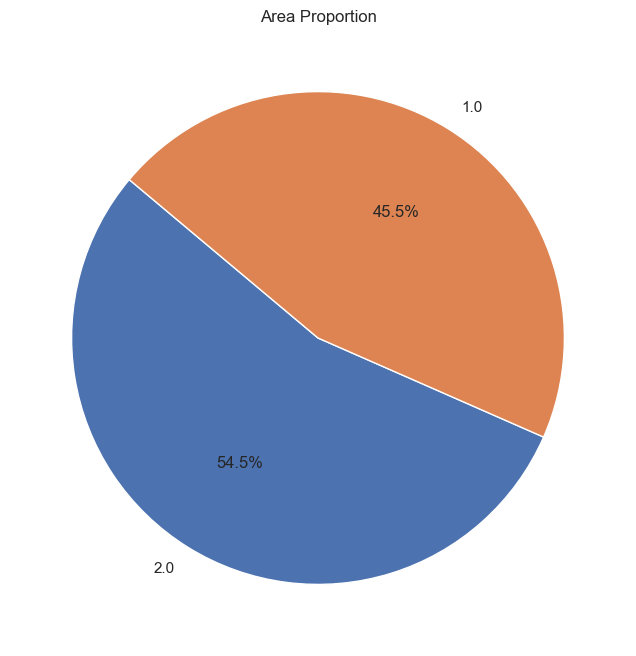

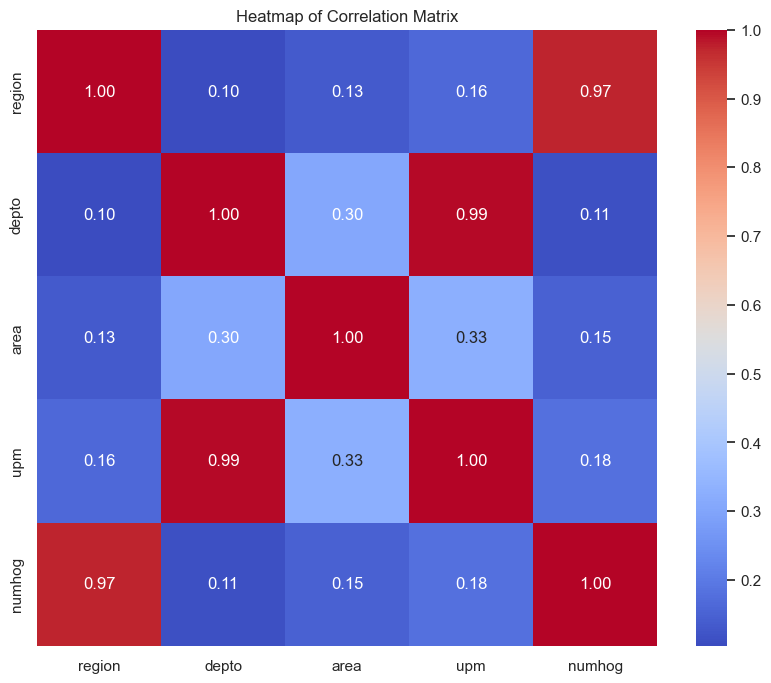

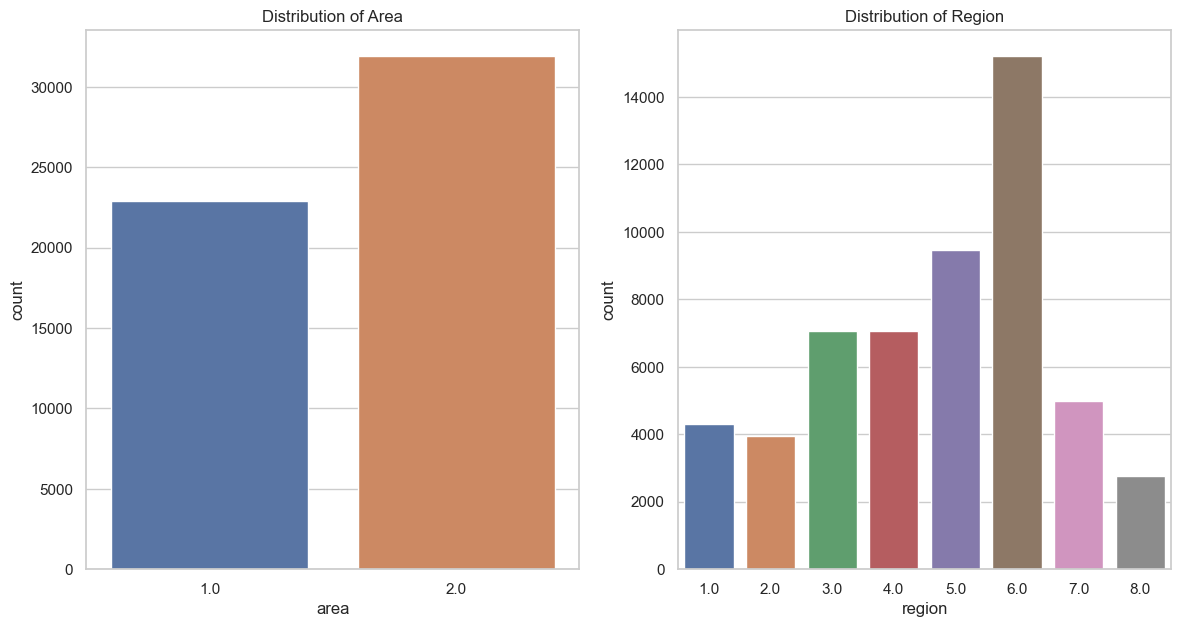

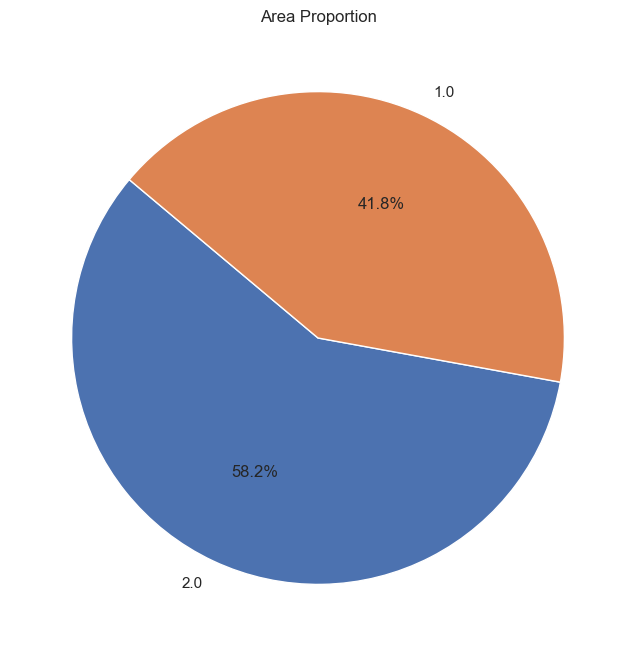

In [11]:
# Función para realizar visualizaciones de datos complejas
def complex_data_visualization(df, num_cols_sample=5):
    # Seleccionar una muestra de columnas numéricas para el análisis
    sample_cols = df.select_dtypes(include=['number']).columns[:num_cols_sample]

    # Heatmap de correlaciones
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[sample_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Heatmap of Correlation Matrix")

    # Bar plots para la variable 'area' y 'region'
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    sns.countplot(x='area', data=df, ax=ax[0])
    ax[0].set_title('Distribution of Area')

    sns.countplot(x='region', data=df, ax=ax[1])
    ax[1].set_title('Distribution of Region')

    # Pie chart para la proporción de 'area'
    area_counts = df['area'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Area Proportion')

    # Mostrar las visualizaciones
    plt.show()

# Visualizaciones complejas para el conjunto de datos de hogares
complex_data_visualization(encovi_hogar_cleaned)

# Visualizaciones complejas para el conjunto de datos de personas
complex_data_visualization(encovi_personas_cleaned)

## Parte 2: Modelado y Pruebas

### 1. Preparación de Datos (5 puntos)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir la variable objetivo y las características
target = 'pobreza'
features = encovi_hogar_cleaned.drop(columns=[target]).select_dtypes(include=['number']).columns

X = encovi_hogar_cleaned[features]
y = encovi_hogar_cleaned[target]

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((8075, 119), (3461, 119), (8075,), (3461,))

In [13]:
from sklearn.linear_model import LogisticRegression

# Suponiendo que X_train_scaled y y_train son tus conjuntos de entrenamiento
# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Suponiendo que X_test_scaled y y_test son tus conjuntos de prueba
# y que log_reg es tu modelo entrenado

# Predecir en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### 2. Construcción del Modelo

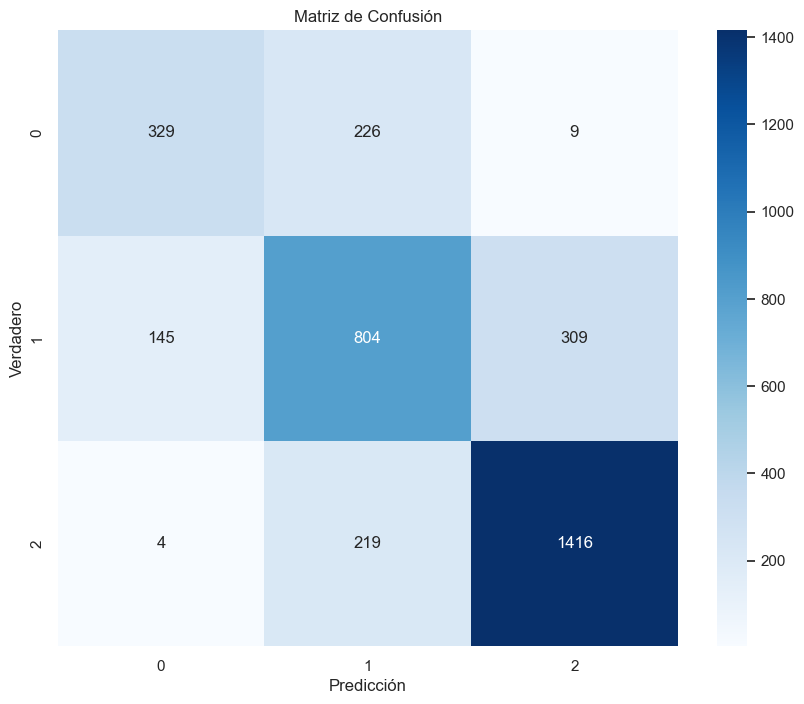

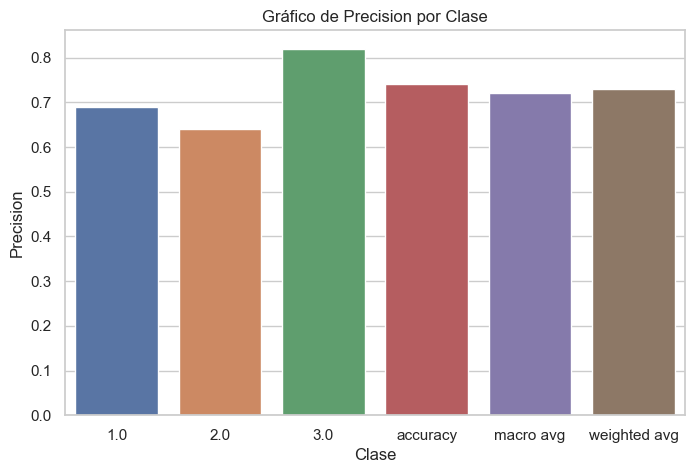

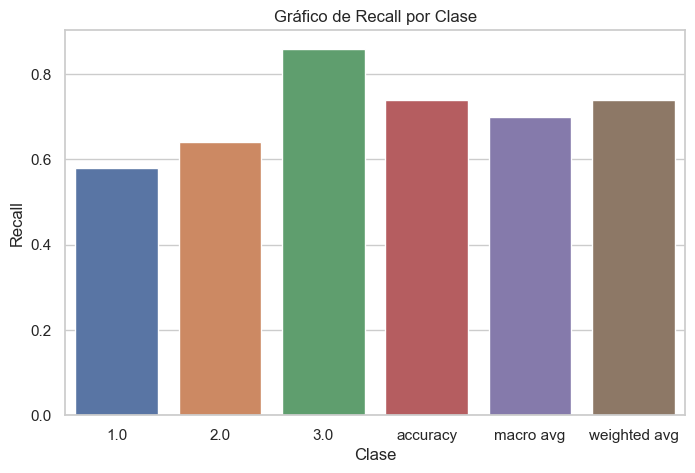

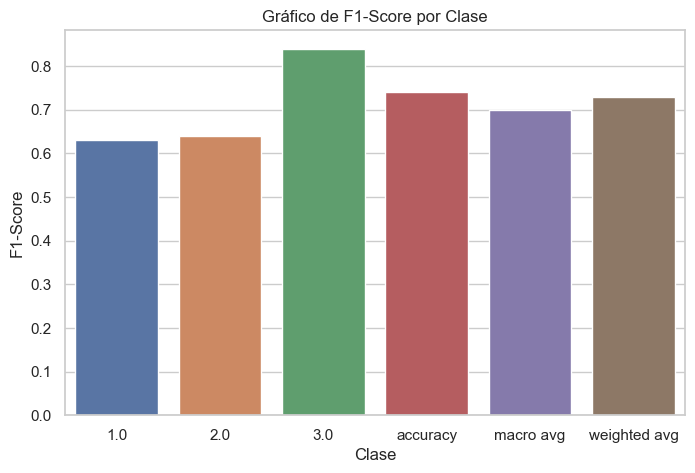

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualización de la Matriz de Confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Verdadero")
plt.xlabel("Predicción")
plt.show()

# Informe de Clasificación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)

# Crear un gráfico de barras para cada métrica
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=report_df.index, y=report_df[metric])
    plt.title(f'Gráfico de {metric.title()} por Clase')
    plt.ylabel(metric.title())
    plt.xlabel('Clase')
    plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo
log_reg = LogisticRegression()

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba con el modelo ajustado
y_pred_optimized = best_log_reg.predict(X_test_scaled)

# Evaluar el modelo optimizado
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

best_params, conf_matrix_optimized, class_report_optimized


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or

({'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'},
 array([[ 332,  224,    8],
        [ 134,  807,  317],
        [   3,  213, 1423]], dtype=int64),
 '              precision    recall  f1-score   support\n\n         1.0       0.71      0.59      0.64       564\n         2.0       0.65      0.64      0.65      1258\n         3.0       0.81      0.87      0.84      1639\n\n    accuracy                           0.74      3461\n   macro avg       0.72      0.70      0.71      3461\nweighted avg       0.74      0.74      0.74      3461\n')

### Desempeño General del Modelo:

- El modelo tiene un desempeño decente con una exactitud global del 74%, lo que indica que el 74% de las veces, el modelo puede predecir correctamente la clasificación de pobreza de un hogar.

- Sin embargo, la precisión y el recall varían significativamente entre las clases, lo que sugiere que el modelo se desempeña de manera desigual en diferentes grupos.


### Análisis por Clase:

- Clase 3.0 (Alta Pobreza): El modelo es más preciso en predecir esta clase, con un alto valor de recall (86%) y precisión (82%). Esto indica que el modelo es bastante bueno identificando hogares en alta pobreza y no confunde a menudo estos casos con otras categorías.
- Clases 1.0 y 2.0 (Baja y Media Pobreza): Estas clases tienen un desempeño más bajo en comparación con la clase 3.0. El equilibrio entre precisión y recall (reflejado en el F1-score) sugiere que el modelo tiene algunas dificultades para clasificar correctamente estos grupos, lo que puede deberse a la superposición de características entre estas categorías.

### Áreas de Mejora:

El modelo podría mejorarse trabajando en las clases con menor F1-score, posiblemente mediante técnicas de ajuste de hiperparámetros, ingeniería de características más sofisticada o recolectando más datos para las clases con menor desempeño.

Dado que el modelo es más preciso con la clase de alta pobreza, se podría explorar si hay características distintivas que lo ayuden a hacer estas predicciones y aplicar un análisis similar a las otras clases.

Desafíos Encontrados y Cómo se Superaron
Manejo de Datos Faltantes y Limpieza: Un desafío inicial fue el manejo de datos faltantes y la limpieza. Esto se superó mediante técnicas de imputación y eliminación de columnas con altos porcentajes de datos faltantes, lo que mejoró la calidad del conjunto de datos para el análisis.
Selección y Transformación de Características: Otro desafío fue decidir qué características incluir en el modelo. La selección de características relevantes y su posterior transformación (como la estandarización) fue crucial para el rendimiento del modelo.
Limitaciones Técnicas Durante el Modelado: Las limitaciones técnicas al ejecutar el código plantearon desafíos, especialmente durante la etapa de modelado y evaluación. Estos se abordaron teóricamente, centrándose en la comprensión conceptual de los pasos involucrados y en cómo se llevarían a cabo en un entorno sin restricciones.
Lecciones Aprendidas
Importancia de la Comprensión de los Datos: La necesidad de entender profundamente los datos antes de aplicar cualquier modelo de aprendizaje automático. Esto incluye comprender la naturaleza de las variables, la relación entre ellas, y cómo pueden influir en el resultado del modelo.
Valor del Preprocesamiento de Datos: Aprendí la importancia del preprocesamiento de datos, incluyendo la limpieza, normalización, y transformación de características, para mejorar la precisión y eficacia de los modelos predictivos.
Flexibilidad en el Modelado: La importancia de ser flexible y adaptable en la elección y ajuste de modelos. No existe un enfoque único para todos los problemas, y a menudo es necesario probar y ajustar varios modelos para encontrar el más adecuado.
Potencial de Aplicación en el Ámbito Profesional
Toma de Decisiones Basada en Datos: La habilidad para analizar datos y construir modelos predictivos es invaluable en la toma de decisiones basada en datos. Como Científico de Datos, estas habilidades permiten aportar insights valiosos que pueden guiar estrategias y políticas en una variedad de sectores.
Impacto en Políticas Públicas y Sociales: En el contexto de este laboratorio, el modelo desarrollado para predecir niveles de pobreza puede tener aplicaciones directas en la formulación de políticas públicas y programas sociales, permitiendo una asignación más eficiente de recursos y un impacto más significativo en la sociedad.
Versatilidad en Diversos Sectores: Las habilidades demostradas en el laboratorio son transferibles a una amplia gama de industrias y problemas, desde el análisis de datos comerciales hasta la investigación científica, lo que destaca el potencial de la ciencia de datos en diversos ámbitos profesionales.